In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')

sns.set(style='white')

## churn prediction Dataset

In [16]:
# readin csv file
data = pd.read_csv("churn_prediction.csv")

In [17]:
#top 5 rows
data.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26                        12419.41   
2                        4910.17                         2815.94   
3                        2084.54                         1006.54   
4                        1643.31                         1871.12   

   current_month_credit  previous_month_credit  current_month_debit  \
0                  0.20                   0.20                 0.20   
1                  0.56                   0.56              5486.27   
2                  0.61                   0.61              6046.73   
3                  0.47                   0.47                 0.47   
4                  0.33                 714.61               588.62   

   previous_month_debit  current_month_balance  previous_month_balance  churn  \
0                  0.20                1458.71                 1458.71      0   
1                100.56                6496.78                 8787.61      0   
2                259.23                5006.28                 5070.14      0   
3               2143.33                2291.91                 1669.79      1   
4               1538.06                1157.15                 1677.16      1   

   last_transaction  
0        2019-05-21  
1        2019-11-01  
2               NaT  
3        2019-08-06  
4        2019-11-03  

[5 rows x 21 columns]

In [18]:
data.shape

(28382, 21)

In [19]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [20]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

## Age of Customers

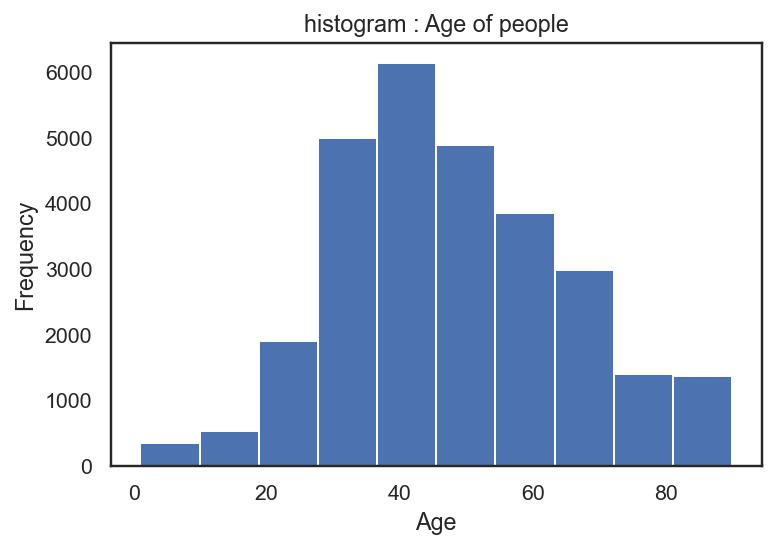

In [21]:
plt.figure(dpi = 140)
plt.hist(data['age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("histogram : Age of people")
plt.show()

In [22]:
# calculating points of standart deviation
age = data['age']
a_mean = age.mean()
a_median = age.median()
a_stdev = age.mean() - age.std(), age.mean() + age.std()

# checking
a_mean, a_median, a_stdev

(48.208336269466564, 46.0, (30.401172896500047, 66.01549964243308))

### calculating poins of standard deviation


In [23]:
age = data['age']
a_mean = age.mean()
a_median = age.median()
a_stdev =  age.mean() - age.std(), age.mean() + age.std()


a_mean, a_median, a_stdev

(48.208336269466564, 46.0, (30.401172896500047, 66.01549964243308))

## plotting KDE with descriptives

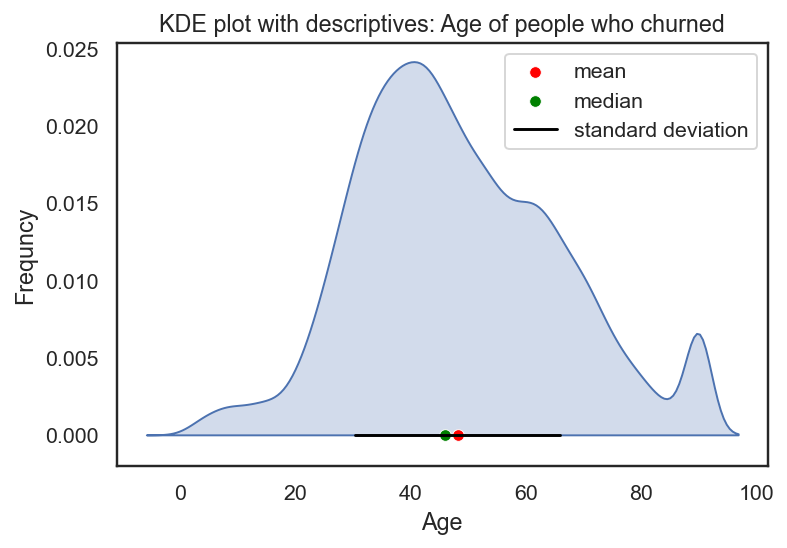

In [24]:
plt.figure(dpi = 140)
sns.kdeplot(age, shade = True)
sns.scatterplot([a_mean], [0], color='red', label = 'mean')
sns.scatterplot([a_median], [0], color='green', label = 'median')

# plt.ylim(bottom=-00.2)
plt.ylim(bottom=-.002)

sns.lineplot(a_stdev, [0,0], color= 'black', label = 'standard deviation')
plt.xlabel('Age')
plt.ylabel("Frequncy")
plt.title("KDE plot with descriptives: Age of people who churned")

plt.show()

## qq blot

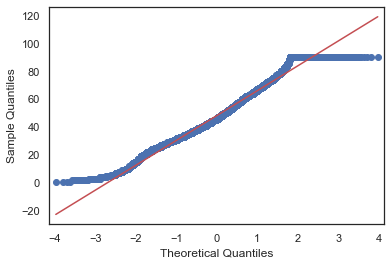

In [25]:
sm.qqplot(age, line='s')
plt.show()

## 

In [26]:
data['age'].skew()

0.33058929557517264

In [27]:
data['age'].kurtosis()

-0.16866785691275865

## calculating measures

In [28]:
v_mean = data['vintage'].mean()
v_median = data['vintage'].median()
v_mode = data['vintage'].mode()

In [29]:
print(data[data['vintage'] == 2251].shape[0])
print(data[data['vintage'] ==2260].shape[0])

69
69


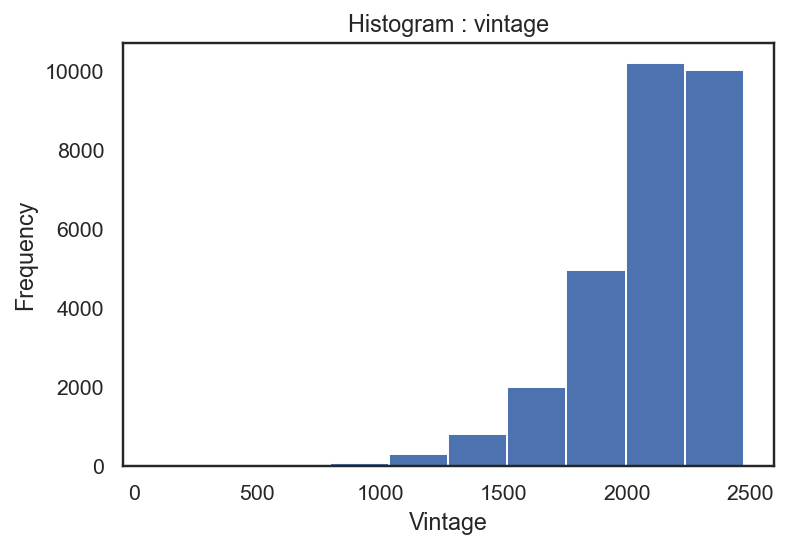

In [31]:
## plotting histogram
plt.figure(dpi = 140)
plt.hist(data['vintage'])

plt.xlabel('Vintage')
plt.ylabel("Frequency")
plt.title("Histogram : vintage")
plt.show()

<AxesSubplot:xlabel='vintage', ylabel='Density'>

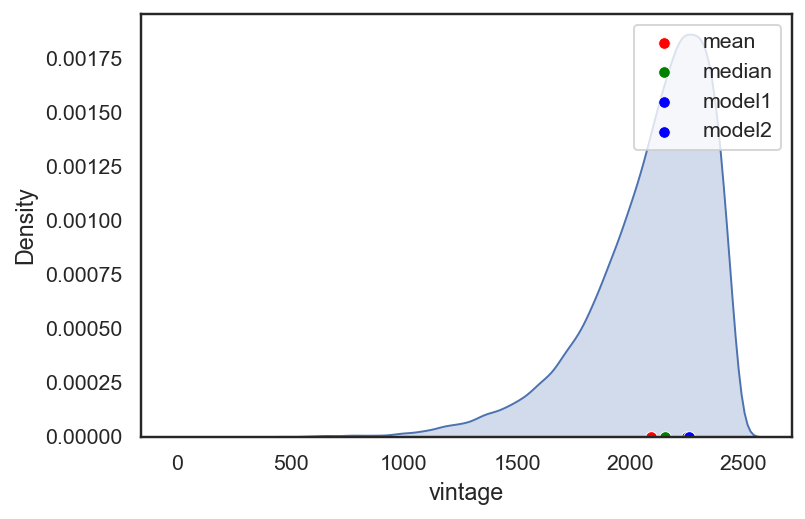

In [32]:
# plotting KDE with descriptives
plt.figure(dpi = 140)
sns.kdeplot(data['vintage'], shade=True)
sns.scatterplot( [v_mean], [0] , color = 'red', label = 'mean')
sns.scatterplot( [v_median], [0] , color = 'green', label = 'median')
sns.scatterplot( [v_mode[0]], [0] , color = 'blue', label = 'model1')
sns.scatterplot( [v_mode[1]], [0] , color = 'blue', label = 'model2')

# explain skewness

In [33]:
data['vintage'].skew()

-1.3889357082821185

In [34]:
data['vintage'].kurtosis()

2.7234245375227926

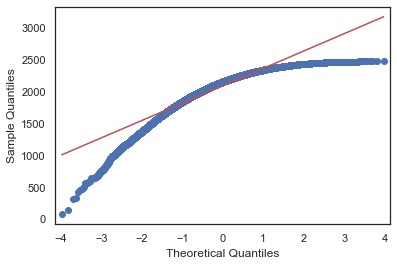

In [35]:
#qq plot explain
sm.qqplot(data['vintage'], line='s')
plt.show()